In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import os
import seaborn as sns

In [2]:
path = '/Users/wasilengel/Desktop/School/Harris/AP2/PSet 2'
labels_path = os.path.join(path, 'IAEPv2_0_2015labels.csv')
numbers_path = os.path.join(path, 'IAEPv2_0_2015numeric.csv')
wb_path = os.path.join(path, 'API_NE.CON.GOVT.ZS_DS2_en_csv_v2_2055671.csv')

## 3

In [3]:
df_1 = pd.read_csv(labels_path)

In [4]:
pd.set_option('max_columns', None) # displays all columns
df_1.head()

,cname,cabr,ccode,year,formalconstit,writconstit,ineffect,cease,amend,amfrmlconv,amexec,amleg,amregprov,rat,ratfrmlconv,ratexec,ratleg,ratref,ratregprov,amyear,leg,legcham,lowcham,upcham,chamother,uppub,upselect,upexec,lowpub,lowselect,lowexec,proppub,propexec,propleg,execveto,legveto,removeexec,removeleg,execforce,exectax,execbudget,court,remove,life,courtexec,courtleg,centralbank,dirterm,bankpol,elecexec,elecleg,elecrefer,exleg,execindep,execappoint,milpm,milpres,milnone,legpm,legpres,legnone,callpm,callpres,callnone,schedexec,schedleg,schedboth,schedna,lpartynom,lprimary,lselfnom,lpetition,lexecnom,epartynom,eprimary,eselfnom,epetition,banned,banethnic,banrelig,bansys,banall,stateparty,suffage,suffgen,suffprop,suffparty,suffethrel,suffcrim,suffreg,suffother,election,electexec,electleg,electboth,legcompet,execcompet,electboy,electprot,postprot,legelig,execelig,estabcon_year,execpocketveto,id,estabcon,ceasedate,legelecdate,exelecdate,rattreaty,appelec,whoby,govstruct,regstruct,bankdir,electtime,elecperiod,reservedseat,reservedby,lelecsystem,eelect,eelectrules,parties,electpost,electdelay,protestpart,lastamend,timeineffect,constage,milother,legother,callother,gwno
0,United States of America,USA,2,1960,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,2,435,100,0,Yes,No,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,No,N/A - no postponed/canceled election,63.06,63.06,1787.0,Yes,2 1960,17sep1787,.c,08nov1960,08nov1960,Both chambers' approval necessary,Appointed,Legislature,Federal system,Autonomous decision,Executive app. with leg. cons.,"Yes, exact periods",One day,3,N/A - no reserved seats,Plurality (FPP),Indirect public vote,Majority rule,Two,None of the above,N/A - no election protest,N/A - no election protest,0.0,0.0,173,0,0,0,2.0
1,United States of America,USA,2,1961,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,2,435,100,0,Yes,No,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,Yes,Yes,No,N/A - no election this year,N/A - no election this year,N/A - no election this year,Missing information,Missing information,N/A - no election this year,N/A - no election this year,N/A - no election this year,.o,.o,1787.0,Yes,2 1961,17sep1787,.c,.o,.a,Both chambers' approval necessary,Appointed,Legislature,Federal system,Autonomous decision,Executive app. with leg. cons.,"Yes, exact periods",One day,3,N/A - no reserved seats,Plurality (FPP),Indirect public vote,Majority rule,Two,N/A - no election this year,N/A - no election this year,N/A - no election this year,1.0,1.0,174,0,0,0,2.0
2,United States of America,USA,2,1962,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,2,435,100,0,Yes,No,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,N/A - no postponed/canceled election,47.27,.a,1787.0,Yes,2 1962,17sep1787,.c,06nov1962,.a,Both chambers' approval necessary,Appointed,Legislature,Federal system,Autonomous decision,Executive app. with leg. cons.,"Yes, exact periods",One day,3,N/A - no reserved seats,Plurality (FPP),Indirect public vote,Majority rule,Two,None of the above,N/A - no election protest,N/A - no election protest,2.0,2.0,175,0,0,0,2.0
3,United States of America,USA,2,1963,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,2,435,100,0,Yes,No,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,Yes

In [5]:
# df_2 = pd.read_csv(numbers_path)

In [6]:
# pd.set_option('max_columns', None) # displays all columns
# df_2.head()
# Since I don't want to go through the code notebook, I'll use the classified version of the df, which I named df_1

In [7]:
# a 

In [8]:
# Find unique values for lelecsystem, which classifies electoral systems

In [9]:
df_1["lelecsystem"].unique()

array(['Plurality (FPP)', 'Majority', 'Missing information',
       'N/A - no elected legislature', 'N/A - no legislature',
       'Mixed systems', 'Proportional representation'], dtype=object)

In [10]:
# Renaming column values according to instructions 

In [11]:
df_1["lelecsystem"] = df_1['lelecsystem'].replace({'Plurality (FPP)': 'plurality', 'Majority': 'majority', 'Proportional representation': 'proportional representation', 'Mixed systems': 'mixed', 'N/A - no legislature': 'missing', 'N/A - no elected legislature': 'missing', 'Missing information': 'missing'})

In [12]:
df_1["lelecsystem"].unique()

array(['plurality', 'majority', 'missing', 'mixed',
       'proportional representation'], dtype=object)

In [13]:
# Reducing df_1 to essential columns needed for this assignment: df_1_red

In [14]:
df_1_red = df_1[["cabr", "cname", "year", "lelecsystem", "parties"]]
df_1_red.head()

,cabr,cname,year,lelecsystem,parties
0,USA,United States of America,1960,plurality,Two
1,USA,United States of America,1961,plurality,Two
2,USA,United States of America,1962,plurality,Two
3,USA,United States of America,1963,plurality,Two
4,USA,United States of America,1964,plurality,Two


In [15]:
df_1_red_2011 = df_1_red[df_1_red["year"] == 2011]
# df_1_red_2011["year"].unique() # check that it works -> Yes, 2011 is the unique value
df_1_red_2011.head() # 163 rows that means we have data for 163 countries here

,cabr,cname,year,lelecsystem,parties
51,USA,United States of America,2011,plurality,Two
104,CAN,Canada,2011,majority,More than two
157,CUB,Cuba,2011,majority,One
210,HAI,Haiti,2011,mixed,More than two
263,DOM,Dominican Republic,2011,proportional representation,Two


In [16]:
# Plot world map showing the varying electoral systems across the world

In [17]:
## Prepare

In [18]:
# First, merge geopandas data with our data: 'naturalearth_lowres' is geopandas datasets so I can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# Reduce size to essential columns
world = world[["iso_a3", "name", "geometry"]]
world # 177 rows
# Rename the columns in world dataframe so that I can merge
world.columns=['iso_a3', 'cname', 'geometry']
merged = pd.merge(world, df_1_red_2011, on='cname')
merged.head() # 147 rows: yields more matches than when merging on cabr

,iso_a3,cname,geometry,cabr,year,lelecsystem,parties
0,TZA,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TAZ,2011,plurality,One
1,CAN,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,2011,majority,More than two
2,USA,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,2011,plurality,Two
3,KAZ,Kazakhstan,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",KZK,2011,mixed,One
4,UZB,Uzbekistan,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",UZB,2011,majority,More than two


In [19]:
## Plot 

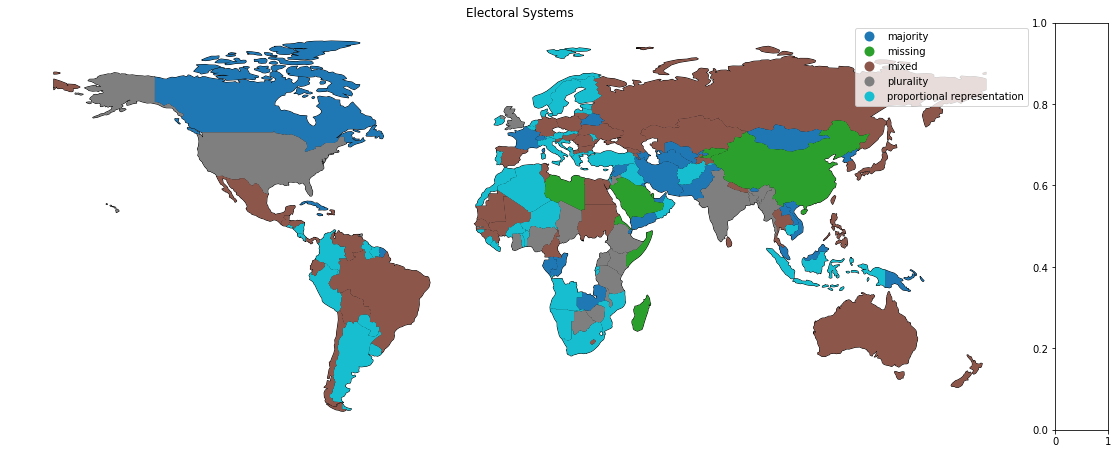

In [20]:
fig, ax = plt.subplots(figsize=(20,20))
merged.plot(ax=ax, color='white', edgecolor='black')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
ax = merged.plot(ax=ax, column='lelecsystem', legend=True, cax=cax) 
ax.axis('off')
ax.set_title('Electoral Systems');

In [21]:
# b 

In [22]:
# Refer back to df_1_red_2011
# Focus on and identify unique values of "parties" column that captures 
# the number of parties with more than 5% of seats in the legislature

In [23]:
df_1_red_2011

,cabr,cname,year,lelecsystem,parties
51,USA,United States of America,2011,plurality,Two
104,CAN,Canada,2011,majority,More than two
157,CUB,Cuba,2011,majority,One
210,HAI,Haiti,2011,mixed,More than two
263,DOM,Dominican Republic,2011,proportional representation,Two
...,...,...,...,...,...
7317,ETM,East Timor,2011,proportional representation,More than two
7370,AUL,Australia,2011,mixed,More than two
7407,PNG,Papua New Guinea,2011,majority,More than two
7460,NEW,New Zealand,2011,mixed,More than two


In [24]:
df_1_red_2011["parties"].unique()

array(['Two', 'More than two', 'One', 'Missing information'], dtype=object)

In [25]:
# Rename in order to have shorter legend
df_1_red_2011["parties"] = df_1['parties'].replace({'Two': "2", 'More than two': "2<", 'One': "1", 'Missing information': "N/A"})
df_1_red_2011

<ipython-input-25-1fa070070d36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_red_2011["parties"] = df_1['parties'].replace({'Two': "2", 'More than two': "2<", 'One': "1", 'Missing information': "N/A"})


,cabr,cname,year,lelecsystem,parties
51,USA,United States of America,2011,plurality,2
104,CAN,Canada,2011,majority,2<
157,CUB,Cuba,2011,majority,1
210,HAI,Haiti,2011,mixed,2<
263,DOM,Dominican Republic,2011,proportional representation,2
...,...,...,...,...,...
7317,ETM,East Timor,2011,proportional representation,2<
7370,AUL,Australia,2011,mixed,2<
7407,PNG,Papua New Guinea,2011,majority,2<
7460,NEW,New Zealand,2011,mixed,2<


In [26]:
# Count occurences of parties per electoral system
stacked = df_1_red_2011.groupby(['lelecsystem', "parties"])["cabr"].count().reset_index(name="count")
stacked

,lelecsystem,parties,count
0,majority,1,6
1,majority,2,7
2,majority,2<,19
3,majority,N/A,2
4,missing,1,1
5,missing,N/A,9
6,mixed,1,2
7,mixed,2,8
8,mixed,2<,33
9,plurality,1,4


In [27]:
# Draw a figure showing the relationship between parties and lelecsystem
# I want to display the number of parties (Y) per lelecsystem (X) using a stacked bar
# For lelecsystem, I excluded "Mixed" and "Missing" to prove Duverger's Law that focuses on majority/ plurality v. proportional
# I also summed majority and plurality displaying it in one column as to make a direct comparison with proportional
# For parties, I excluded "N/A" and "1" to prove Duverger's Law that focuses on two vs. more than two parties 

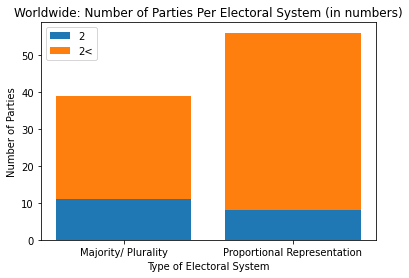

In [28]:
labels = ['Majority/ Plurality', 'Proportional Representation']
two = [7+4, 8]
twoplus = [19+9, 48]
# Drawing the numbers from the previous table 

fig, ax = plt.subplots()

plt.bar(labels, two, label = "2")
plt.bar(labels, twoplus, bottom = two, label = "2<")

ax.set_ylabel('Number of Parties')
ax.set_xlabel('Type of Electoral System')
ax.set_title('Worldwide: Number of Parties Per Electoral System (in numbers)')
ax.legend()

plt.show()

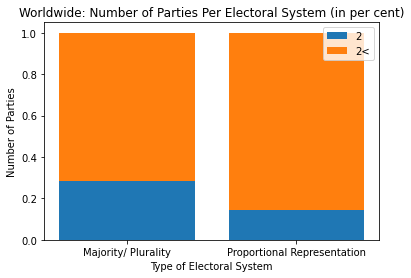

In [29]:
labels = ['Majority/ Plurality', 'Proportional Representation']
two = [11/39, 8/56]
twoplus = [28/39, 48/56]
# Standardizing numbers to percentages

fig, ax = plt.subplots()

plt.bar(labels, two, label = "2")
plt.bar(labels, twoplus, bottom = two, label = "2<")

ax.set_ylabel('Number of Parties')
ax.set_xlabel('Type of Electoral System')
ax.set_title('Worldwide: Number of Parties Per Electoral System (in per cent)')
ax.legend()

plt.show()

In [30]:
# c 

In [31]:
df_2 = pd.read_csv(wb_path,
                    header=2)
# Download in Safari because Chrome not working

In [32]:
df_2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,General government final consumption expenditu...,NE.CON.GOVT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.969116,20.160882,23.594367,21.975957,21.856081,21.410594,24.527204,25.151079,24.709784,23.163700,23.130393,22.649770,21.662038,21.978022,25.374469,27.155878,25.985977,28.102270,19.851117,18.202020,17.049369,16.782822,16.687991,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,General government final consumption expenditu...,NE.CON.GOVT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,General government final consumption expenditu...,NE.CON.GOVT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.154633,19.130579,21.854259,14.312060,16.029037,15.341722,15.536935,16.814611,19.898590,17.042344,18.235861,17.842634,21.621949,17.975660,16.432832,13.880682,12.935822,10.474545,10.329280,NaN,NaN
3,Albania,ALB,General government final consumption expenditu...,NE.CON.GOVT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.311652,8.843534,8.898613,9.093995,9.751531,9.639551,9.61343,9.996173,9.805062,9.131903,19.188547,22.875333,21.408288,14.63841,14.623402,13.827115,9.453608,10.448073,10.844270,11.055614,9.692358,10.625987,11.335078,11.098397,11.205908,11.031218,10.527249,10.477482,10.378966,11.109436,11.157382,10.974193,10.844824,11.025496,11.451836,11.110666,11.269294,11.498373,11.293596,11.523943,NaN,NaN
4,Andorra,AND,General government final consumption expenditu...,NE.CON.GOVT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df_2.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [34]:
df_2_red = df_2[['Country Name', 'Country Code', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012']] # 264 rows
df_2_red = df_2_red.dropna() # 200 rows
df_2_red.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Aruba,ABW,21.410594,24.527204,25.151079,24.709784,23.163700,23.130393,22.649770,21.662038,21.978022,25.374469,27.155878,25.985977,28.102270
3,Albania,ALB,9.692358,10.625987,11.335078,11.098397,11.205908,11.031218,10.527249,10.477482,10.378966,11.109436,11.157382,10.974193,10.844824
5,Arab World,ARB,18.738102,18.442901,18.410769,17.124296,17.180550,15.697191,15.111359,14.809301,13.554772,16.992467,15.988884,15.670475,15.862150
7,Argentina,ARG,13.784191,14.156274,12.235247,11.438057,11.114636,12.141861,12.429415,12.989324,13.633513,15.903897,15.163718,15.688957,16.645438
8,Armenia,ARM,10.798668,10.341338,9.169042,9.384796,9.356232,9.710012,9.265641,9.398192,9.395906,12.283726,12.043708,11.910293,10.909964


In [35]:
# Calculate average of government spending for each country between 2000 and 2012 

In [36]:
gdp = df_2_red.loc[: , '2000':'2012'] # select all columns with years: 2000 to 2012
df_2_red['mean'] = gdp.mean(axis=1) # calculate mean and create new column "mean"
df_2_red.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,mean
0,Aruba,ABW,21.410594,24.527204,25.151079,24.709784,23.163700,23.130393,22.649770,21.662038,21.978022,25.374469,27.155878,25.985977,28.102270,24.230860
3,Albania,ALB,9.692358,10.625987,11.335078,11.098397,11.205908,11.031218,10.527249,10.477482,10.378966,11.109436,11.157382,10.974193,10.844824,10.804498
5,Arab World,ARB,18.738102,18.442901,18.410769,17.124296,17.180550,15.697191,15.111359,14.809301,13.554772,16.992467,15.988884,15.670475,15.862150,16.429478
7,Argentina,ARG,13.784191,14.156274,12.235247,11.438057,11.114636,12.141861,12.429415,12.989324,13.633513,15.903897,15.163718,15.688957,16.645438,13.640348
8,Armenia,ARM,10.798668,10.341338,9.169042,9.384796,9.356232,9.710012,9.265641,9.398192,9.395906,12.283726,12.043708,11.910293,10.909964,10.305194


In [37]:
# df_2_red.columns

In [38]:
# Merge (first renaming merging column: Country Name)

In [40]:
df_2_red.columns=['cname', 'Country Code', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', 'mean']
merged_2 = pd.merge(df_2_red, df_1_red_2011, on='cname')
merged_2.head() # 123 rows: yields more matches than when merging on cabr, still sufficiently large

,cname,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,mean,cabr,year,lelecsystem,parties
0,Albania,ALB,9.692358,10.625987,11.335078,11.098397,11.205908,11.031218,10.527249,10.477482,10.378966,11.109436,11.157382,10.974193,10.844824,10.804498,ALB,2011,proportional representation,2<
1,Argentina,ARG,13.784191,14.156274,12.235247,11.438057,11.114636,12.141861,12.429415,12.989324,13.633513,15.903897,15.163718,15.688957,16.645438,13.640348,ARG,2011,proportional representation,2<
2,Armenia,ARM,10.798668,10.341338,9.169042,9.384796,9.356232,9.710012,9.265641,9.398192,9.395906,12.283726,12.043708,11.910293,10.909964,10.305194,ARM,2011,mixed,2<
3,Australia,AUS,17.787098,17.783158,17.544246,17.595386,17.495375,17.561589,17.479803,17.343937,17.242653,17.591547,17.999002,17.810750,17.986232,17.632367,AUL,2011,mixed,2<
4,Austria,AUT,19.219717,18.976168,18.838697,18.979640,18.891359,19.346273,19.258290,18.744792,19.272131,20.684213,20.492548,19.896568,19.860692,19.420084,AUS,2011,proportional representation,2<


In [41]:
# Show relationship using seaborn to show boxplot: lelecsystem v. mean

In [42]:
merged_2 = merged_2[merged_2["lelecsystem"] != "missing"]
# Filtering out missing values in lelecsystem: 119 rows

In [43]:
merged_2["lelecsystem"] = merged_2['lelecsystem'].replace({'proportional representation': 'proportional'})
# Renaming just to have prettier plot

Text(0.5, 1.0, 'Worldwide: Government Spending as a Percentage of GDP between 2000 and 2012')

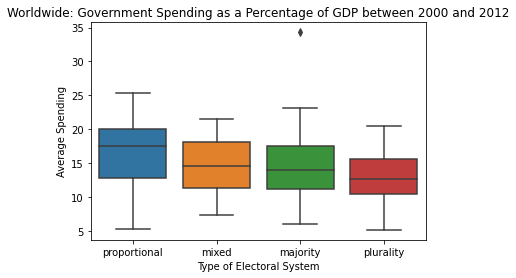

In [44]:
ax = sns.boxplot("lelecsystem", "mean", data=merged_2)
ax.set_ylabel('Average Spending')
ax.set_xlabel('Type of Electoral System')
ax.set_title('Worldwide: Government Spending as a Percentage of GDP between 2000 and 2012')